<a href="https://colab.research.google.com/github/HauThierry/HauThierry/blob/main/ProgObj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programmation fonctionnelle et porté des variables (espace de nommage)


In [2]:
def exemple_porte_variable(exemple): #https://www.python.org/dev/peps/pep-0008/ #global and nonlocal
  print(exemple)

  def function1(exemple):
    print(exemple)

  def function2():
    nonlocal exemple
    exemple = "exemple"
    print(exemple)

  function1('Earth')
  function2()

exemple = 'Soleil'

exemple_porte_variable(exemple)

Soleil
Earth
exemple


In [10]:
planet_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluton']

diametre_planet_list = [1391, 4879, 12104, 12756, 6792, 142984, 120536, 51312, 49922, 2300]

distance_soleil_planet = [57.9, 108.2, 149.6, 227.0, 778, 457, 870, 500, 900]

dictionnaire_list ={
    'Mercure':{'diametre':1391,'distance_soleil':57.9},
    'Venus':{'diametre':4879,'distance_soleil':108.2},
    'Terre':{'diametre':12104,'distance_soleil':149.6}
    }

def find_little_planet(planet_list,diametre_planet_list,distance_soleil_planet):
  name_the_most_little_planet = ''
  diameter_of_the_most_little_planet = 9999999999999999999999999999

  for i,planet_diametre in enumerate(diametre_planet_list):
    print(planet_diametre)
    if planet_diametre < diameter_of_the_most_little_planet:
      diameter_of_the_most_little_planet = planet_diametre
      name_the_most_little_planet = planet_list[i]

  return diameter_of_the_most_little_planet,name_the_most_little_planet

diameter_of_the_most_little_planet,name_of_the_most_little_planet = find_little_planet(planet_list,diametre_planet_list,distance_soleil_planet)
print(f'The most little planet is {name_of_the_most_little_planet} \
      of diameter {diameter_of_the_most_little_planet} km') #f-string 'chaîne de caractère {variable}'

1391
4879
12104
12756
6792
142984
120536
51312
49922
2300
The most little planet is Mercury       of diameter 1391 km


In [7]:
def funct(num):
  num = num + 1
  return num

my_new_number = funct(5)
print(my_new_number)


6


In [8]:
a = [1,2,3,4] # ['0','1','2','3']
a[2],a[0]


(3, 1)

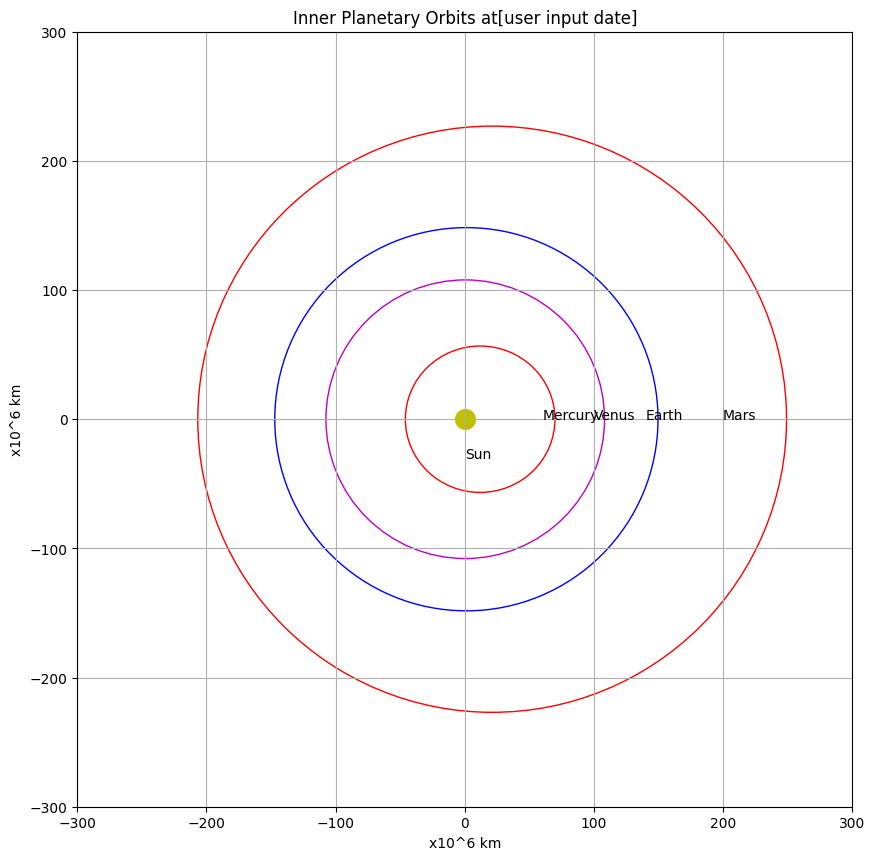

In [15]:
#https://stackoverflow.com/questions/34560620/how-do-i-plot-a-planets-orbits-as-a-function-of-the-time-on-an-already-plotted-ellip
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

#Implementing ellipse equations to generate the values needed to plot an ellipse
#Using only the planet's min (m) and max (M) distances from the sun
#Equations return '2a' (the ellipses width) and '2b' (the ellipses height)
def OrbitLength (M, m):
    a=(M+m)/2
    c=a-m
    e=c/a
    b=a*(1-e**2)**0.5
    return 2*a, 2*b

#This function uses the returned 2a and 2b for the ellipse function's variables
#Also generating the orbit offset (putting the sun at a focal point) using M and m
def PlanetOrbit(Name, M, m,color):
    w, h = OrbitLength(M, m)
    Xoffset= ((M+m)/2)-m
    ellipse = Ellipse(xy=((Xoffset),0), width=w, height=h, angle=0, linewidth=1, fill=False,color=color)
    ax.add_artist(ellipse)
    #plt.annotate(Name, xy=(((M+10)/2),0))

"""
list color matplotlib
b : blue.
g : green.
r : red.
c : cyan.
m : magenta.
y : yellow.
k : black
w : white
"""

"""
Found something similar at this gamedev question:
https://gamedev/stackexchange.com/questions/11116/kepler-orbit-get-position-on-the-orbit-over-time?newreg=e895c2a71651407d8e18915c38024d50
Equations taken from:
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Position_as_a_function_of_time
"""

#Set axes aspect to equal as orbits are almost circular; hence square is needed
fig= plt.figure(figsize=(10,30))

ax= fig.add_subplot(111, aspect='equal')

#Setting the title, axis labels, axis values and introducing a grid underlay
#Variables used so title can indicate user inputed date
plt.title('Inner Planetary Orbits at[user input date]')
plt.xlabel('x10^6 km')
plt.ylabel('x10^6 km')
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
plt.grid()

#Creating the point to represent the sun at the origin (not to scale),
ax.scatter(0,0,s=200,color='y')
plt.annotate('Sun', xy=(0,-30))

#These are the arguments taken from hyperphysics.phy-astr.gsu.edu/hbase/solar/saldata2.html
#They are the planet names, max and min distances, and their longitudinal angle
#Also included is Halley's Comet, used to show different scale and eccentricity
PlanetOrbit('Mercury',69.8,46.0,'r')
PlanetOrbit('Venus',108.2,107.5,'m')
PlanetOrbit('Earth',149.6,147.1,'b')
PlanetOrbit('Mars',249.1,206.7,'r')
plt.annotate('Mars', xy=(200,0))
plt.annotate('Earth', xy=(140,0))
plt.annotate('Venus', xy=(100,0))
plt.annotate('Mercury', xy=(60,0))

plt.show()

Programmation objet


In [19]:
class Planet():
  def __init__(self, diametre, distance_au_soleil,name):
    self.diametre = diametre #attribut
    self.distance_au_soleil = distance_au_soleil
    self.name = name

  def get_description(self): #methode
    print(f"Il s'agit de {self.name} qui a un diametre de {self.diametre} km et une distance au soleil de {self.distance_au_soleil} Millions de kms.")

Earth = Planet(12104,150, 'Earth')
Mars = Planet(12756,228, 'Mars')

Earth.get_description()

Earth.distance_au_soleil = 228

Earth.get_description()

Il s'agit de Earth qui a un diametre de 12104 km et une distance au soleil de 150 Millions de kms.
Il s'agit de Earth qui a un diametre de 12104 km et une distance au soleil de 228 Millions de kms.
